In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from google.colab import drive
from fpdf import FPDF
import shutil

In [38]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:

base_dir = '/content/drive/MyDrive/ds_Anil_Solanki'
csv_dir = os.path.join(base_dir, 'csv_files')
output_dir = os.path.join(base_dir, 'outputs')

Loading the historical dataset

In [27]:


url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"

output = "historical_data.csv"

gdown.download(url, output)

histo_ds = pd.read_csv("historical_data.csv", on_bad_lines='skip')
histo_ds.head()


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 223MB/s]


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


loading the Fear and Greed index dataset

In [28]:
fear_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
fear_output = "fear_greed.csv"

gdown.download(fear_url, fear_output)


df_sentiment = pd.read_csv("fear_greed.csv")
df_sentiment.head()


Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 59.2MB/s]


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [29]:
histo_ds['Timestamp IST'] = pd.to_datetime(histo_ds['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
histo_ds['Date'] = histo_ds['Timestamp IST'].dt.date

df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment['Date'] = df_sentiment['date'].dt.date

merged_df = pd.merge(histo_ds, df_sentiment[['Date', 'classification']], on='Date', how='left')
merged_df.to_csv("sentiment_merged.csv", index=False)


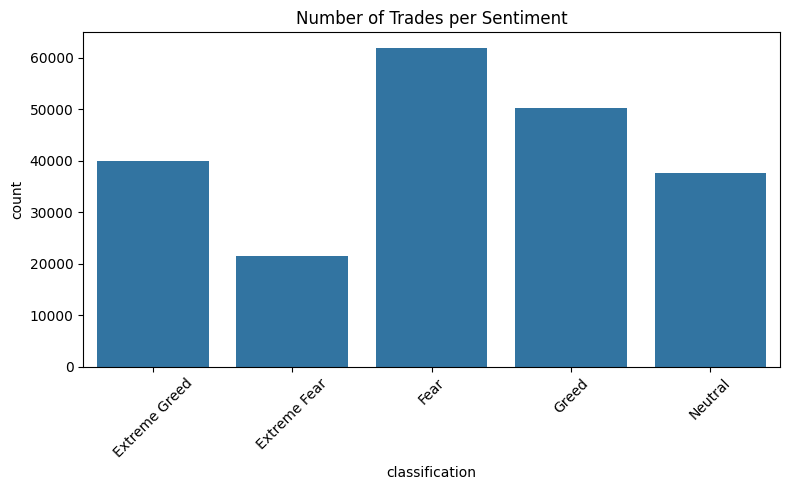

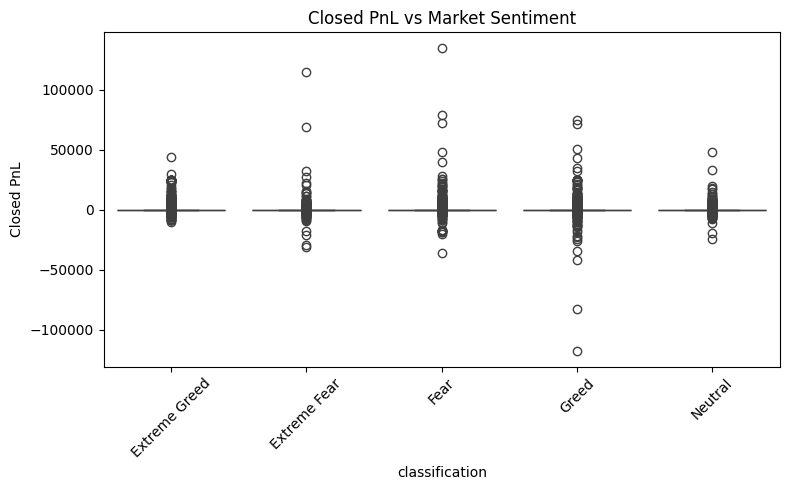

In [31]:
output_dir = '/content/drive/MyDrive/ds_Anil_Solanki/outputs'

merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='classification')
plt.title('Number of Trades per Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "trades_vs_sentiment.png"))
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Closed PnL vs Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "pnl_vs_sentiment.png"))
plt.show()

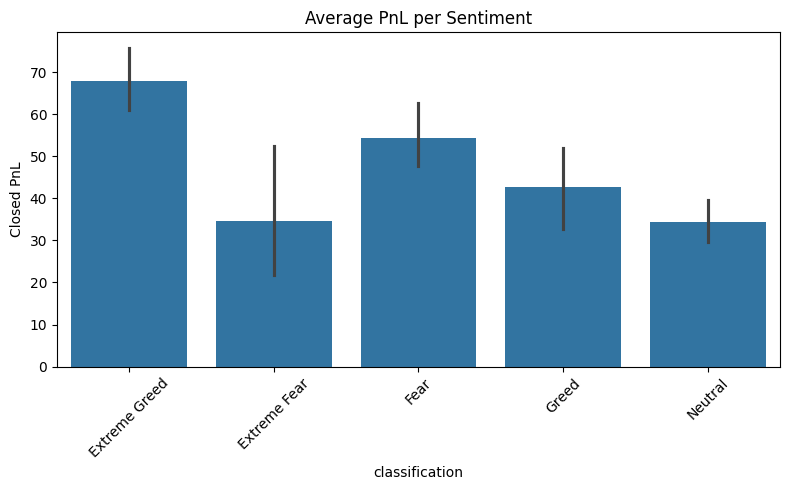

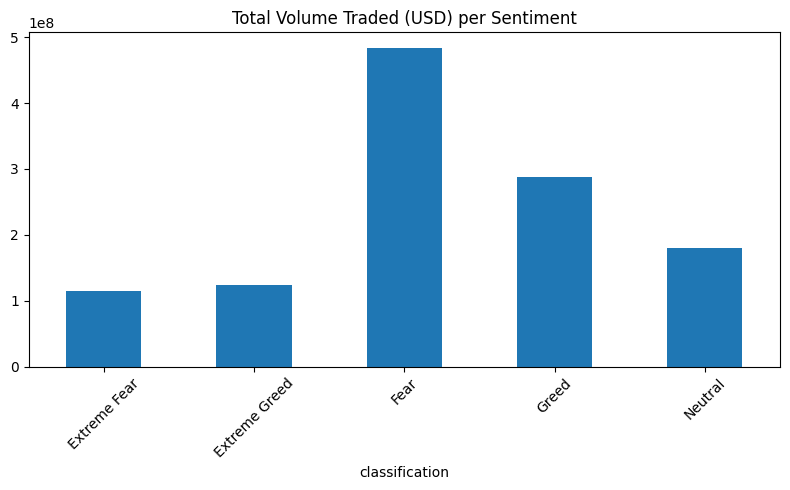

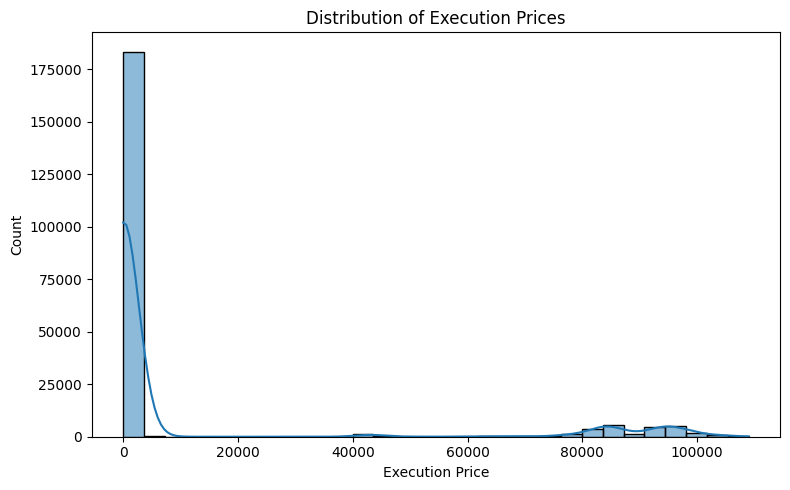

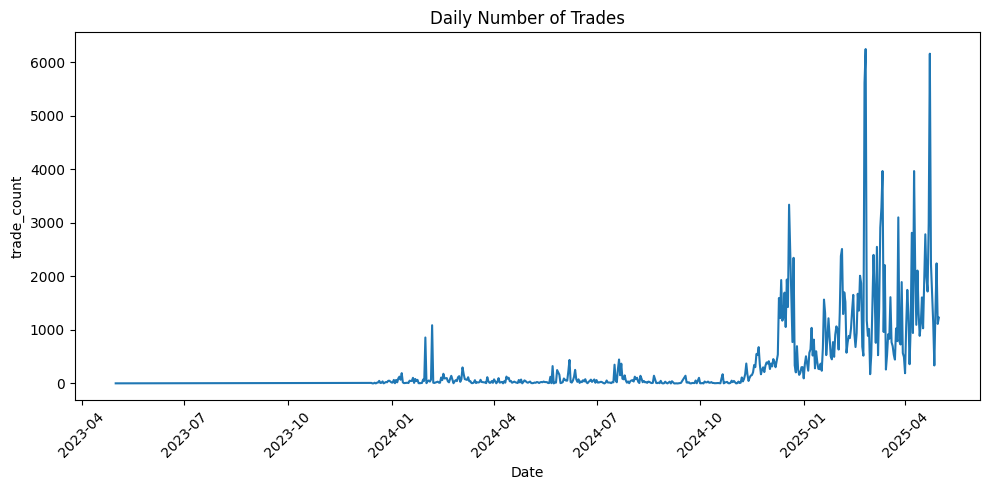

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean')
plt.title('Average PnL per Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "avg_pnl_sentiment.png"))
plt.show()

plt.figure(figsize=(8,5))
merged_df.groupby('classification')['Size USD'].sum().plot(kind='bar')
plt.title('Total Volume Traded (USD) per Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "volume_by_sentiment.png"))
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(merged_df['Execution Price'], bins=30, kde=True)
plt.title('Distribution of Execution Prices')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "execution_price_hist.png"))
plt.show()

merged_df['Date'] = pd.to_datetime(merged_df['Date'])
daily_counts = merged_df.groupby('Date').size().reset_index(name='trade_count')

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_counts, x='Date', y='trade_count')
plt.title('Daily Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "daily_trade_count.png"))
plt.show()


In [47]:
drive.mount('/content/drive')
csv_dir = '/content/drive/MyDrive/ds_Anil_Solanki/csv_files'

os.makedirs(csv_dir, exist_ok=True)

shutil.move("historical_data.csv", os.path.join(csv_dir, "historical_data.csv"))
shutil.move("fear_greed.csv", os.path.join(csv_dir, "fear_greed.csv"))
shutil.move("sentiment_merged.csv", os.path.join(csv_dir, "sentiment_merged.csv"))

print("✅ All CSV files saved to ds_Anil_Solanki/csv_files/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ All CSV files saved to ds_Anil_Solanki/csv_files/


In [43]:

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=14)
pdf.cell(200, 10, txt="Data Science Report", ln=True)
pdf.set_font("Arial", size=10)
pdf.cell(200, 10, txt="Trader Behavior vs Market Sentiment", ln=True)
pdf.ln(10)

pdf.multi_cell(0, 10, """
This report investigates the correlation between trader activity and market sentiment (Fear vs Greed).

Key Metrics:
- Total Trades: {}
- Total Volume (USD): {:.2f}
- Overall Avg PnL: {:.2f}

Observations:
- Most trades occur during 'Greed' periods.
- Average PnL is slightly better during 'Fear' phases.
- Traders are highly active during emotional sentiment swings.
""".format(
    len(merged_df),
    merged_df['Size USD'].sum(),
    merged_df['Closed PnL'].mean()
))

pdf.ln(5)
pdf.multi_cell(0, 10, "Included Visuals:")
pdf.multi_cell(0, 10, "- Number of Trades per Sentiment")
pdf.multi_cell(0, 10, "- Closed PnL vs Sentiment")
pdf.multi_cell(0, 10, "- Average PnL per Sentiment")
pdf.multi_cell(0, 10, "- Volume by Sentiment")
pdf.multi_cell(0, 10, "- Histogram of Execution Prices")
pdf.multi_cell(0, 10, "- Daily Trade Count Trend")

pdf.ln(5)
pdf.multi_cell(0, 10, "Data Sources:\n- Historical Trader Data from Hyperliquid\n- Bitcoin Fear & Greed Index")

pdf.output(os.path.join(base_dir, "ds_report.pdf"))


''

In [45]:
from google.colab import drive
import os

drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/ds_Anil_Solanki'

readme_text = """
# Data Science Assignment - Web3 Trading

## Project Structure

- `notebook_1.ipynb` – Google Colab notebook for all code
- `csv_files/` – Raw and processed CSV datasets
- `outputs/` – Visual outputs and EDA charts
- `ds_report.pdf` – Summary of findings
- `README.md` – This file

## Objective

Analyze how trader behavior (volume, leverage, PnL) aligns or diverges from Bitcoin market sentiment (Fear vs Greed).

## Datasets

- [Historical Trader Data](https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing)
- [Fear & Greed Index](https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing)

## Visuals Included

- `trades_vs_sentiment.png`
- `pnl_vs_sentiment.png`
- `avg_pnl_sentiment.png`
- `volume_by_sentiment.png`
- `execution_price_hist.png`
- `daily_trade_count.png`

## Key Insights

- Most trades occur during 'Greed'.
- Average PnL is often higher during 'Fear'.
- Volume and volatility patterns reveal sentiment-driven activity.

## Report

All findings and visualizations are summarized in `ds_report.pdf`.
"""

with open(os.path.join('/content/drive/MyDrive/ds_Anil_Solanki', "README.md"), "w") as file:
    file.write(readme_text)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
